<a href="https://colab.research.google.com/github/JorgeFCRodrigues/Machine-Learning/blob/main/Base_e_treinamento_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolution

In [2]:
!wget https://data.pjreddie.com/files/yolov3.weights

--2025-09-04 10:19:42--  https://data.pjreddie.com/files/yolov3.weights
Resolving data.pjreddie.com (data.pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3037::6815:589c, ...
Connecting to data.pjreddie.com (data.pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  34.7MB/s    in 7.7s    

2025-09-04 10:19:51 (30.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [3]:
!wget --directory-prefix=downloads http://images.cocodataset.org/zips/val2017.zip
!mkdir -p dataset/images
!unzip downloads/val2017.zip -d dataset/images/

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: dataset/images/val2017/000000212226.jpg  
 extracting: dataset/images/val2017/000000231527.jpg  
 extracting: dataset/images/val2017/000000578922.jpg  
 extracting: dataset/images/val2017/000000062808.jpg  
 extracting: dataset/images/val2017/000000119038.jpg  
 extracting: dataset/images/val2017/000000114871.jpg  
 extracting: dataset/images/val2017/000000463918.jpg  
 extracting: dataset/images/val2017/000000365745.jpg  
 extracting: dataset/images/val2017/000000320425.jpg  
 extracting: dataset/images/val2017/000000481404.jpg  
 extracting: dataset/images/val2017/000000314294.jpg  
 extracting: dataset/images/val2017/000000335328.jpg  
 extracting: dataset/images/val2017/000000513688.jpg  
 extracting: dataset/images/val2017/000000158548.jpg  
 extracting: dataset/images/val2017/000000132116.jpg  
 extracting: dataset/images/val2017/000000415238.jpg  
 extracting: dataset/images/val2017/000000321333.jpg  
 extra

In [4]:
!./darknet detect cfg/yolov3.cfg yolov3.weights dataset/images/val2017/000000000139.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

Selected image: dataset/images/val2017/000000009400.jpg
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x

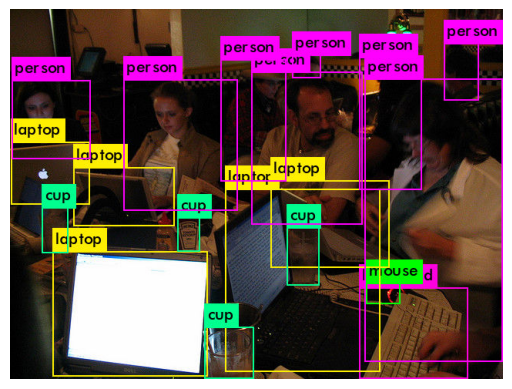

In [6]:
import random
import glob
import matplotlib.pyplot as plt
import cv2
import os

# Get a list of all images in the validation set
image_list = glob.glob('dataset/images/val2017/*.jpg')

# Select a random image
random_image = random.choice(image_list)
print(f"Selected image: {random_image}")

# Run detection on the selected image
!./darknet detect cfg/yolov3.cfg yolov3.weights {random_image}

# Display the result image (predictions.jpg is created by darknet)
result_image_path = 'predictions.jpg'
if os.path.exists(result_image_path):
    img = cv2.imread(result_image_path)
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Detection result image not found.")